In [ ]:
!git clone https://github.com/jmsaavedrar/machine_learning
import sys
sys.path.append('machine_learning')
import numpy as np
import nn.perceptron as perceptron
import sklearn.datasets as datasets
import metrics.metrics as metrics
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:100,1:3]
y = iris.target[:100:]

n = X.shape[0]
n_test = int(np.rint(0.2 * n))

# random sort
idx = np.random.permutation(n)
X = X[idx]
y = y[idx]

X_train = X[:-n_test]
X_test = X[-n_test:]
y_train = y[:-n_test]
y_test = y[-n_test:]

""" data normalization, improve convergence """
mu = np.mean(X_train, axis = 0)
dst = np.std(X_train, axis = 0)
X_train = (X_train - mu) / dst
X_test = (X_test - mu) / dst
print('train: {}'.format(X_train.shape))
print('val: {}'.format(X_test.shape))

it 0 mse loss_bce 0.6996053081173544 loss_mse 0.25322516956678803
it 0 acc 0.4625
it 1 mse loss_bce 0.6906833243226265 loss_mse 0.248769524717576
it 1 acc 0.4875
it 2 mse loss_bce 0.681931438711955 loss_mse 0.2443983455921405
it 2 acc 0.5375
it 3 mse loss_bce 0.6733481901992561 loss_mse 0.24011179858115925
it 3 acc 0.6125
it 4 mse loss_bce 0.6649319419556539 loss_mse 0.23590988059655665
it 4 acc 0.75
it 5 mse loss_bce 0.656680895392012 loss_mse 0.23179242864677746
it 5 acc 0.85
it 6 mse loss_bce 0.6485931041041129 loss_mse 0.22775912976539417
it 6 acc 0.9375
it 7 mse loss_bce 0.6406664876691895 loss_mse 0.2238095311691331
it 7 acc 0.9625
it 8 mse loss_bce 0.6328988451943001 loss_mse 0.2199430505303511
it 8 acc 1.0
it 9 mse loss_bce 0.6252878685291585 loss_mse 0.21615898625896177
it 9 acc 1.0
it 10 mse loss_bce 0.6178311550682081 loss_mse 0.2124565276994618
it 10 acc 1.0
it 11 mse loss_bce 0.6105262200787056 loss_mse 0.20883476515970742
it 11 acc 1.0
it 12 mse loss_bce 0.603370508503156

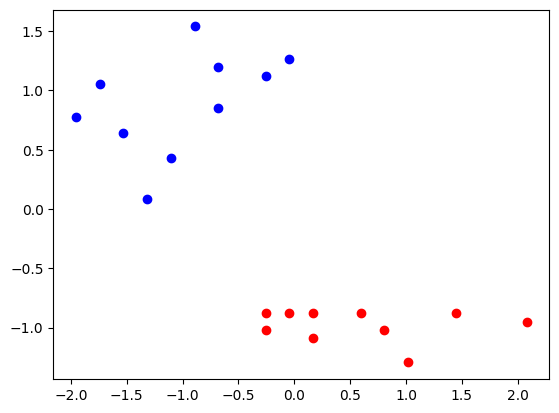

In [ ]:
"""-------------------------------------------"""
#Logistic Regression
model = perceptron.Perceptron()
model.setLoss('mse')
model.setSteps(50)
model.setPrintSteps(1)


coeff = model.fit(X_train, y_train)
#Evaluation (accuracy x clase)
y_pred =model.predict(X_test)


acc= metrics.accuracy(np.expand_dims(y_test, axis = 1) , y_pred)
print('Acc Test {}'.format(acc))



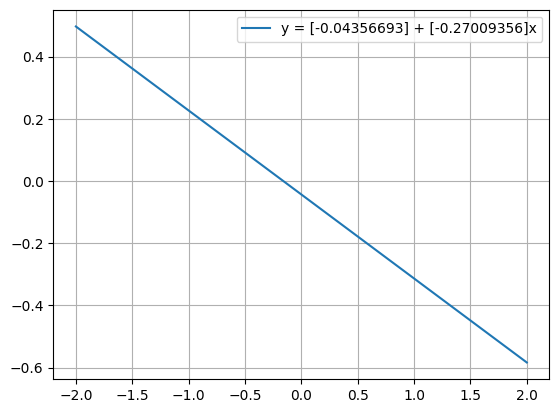

In [ ]:
#--- view
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color = 'red')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color = 'blue')
x = np.linspace(-2, 2, 400)
y = coeff[0] + coeff[1]*x
plt.plot(x, y, label = f'y = {coeff[0]} + {coeff[1]}x')
plt.grid(True)
plt.legend()
plt.show()